<a href="https://colab.research.google.com/github/Rut092/AI-Journey-Practice/blob/main/Article5_Feature_Impurities_and_Selection(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
data = load_wine()

In [7]:
dataset = pd.DataFrame(data.data, columns=data.feature_names)
print(dataset)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [8]:
display(dataset.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
y = data.target

In [12]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
model = RandomForestClassifier(n_estimators=100,random_state=42)

## Notes on the Random Forest Model

Key parameters:
*   `n_estimators`: The number of trees in the forest.
*   `random_state`: Controls both the randomness of the bootstrapping of the samples used when building trees (if `bootstrap=True`) and the sampling of the features to consider when looking for the best split at each node. Setting this to an integer ensures reproducible results.

In [15]:
model.fit(dataset,y)

RandomForestClassifier(random_state=42)

In [20]:
importances = model.feature_importances_

feature_scores = pd.DataFrame({'Feature': dataset.columns, 'Score': importances})
feature_scores

,Feature,Score
0,alcohol,0.141614
1,malic_acid,0.033060
2,ash,0.015534
3,alcalinity_of_ash,0.029885
4,magnesium,0.025873
5,total_phenols,0.035080
6,flavanoids,0.194481
7,nonflavanoid_phenols,0.007310
8,proanthocyanins,0.018387
9,color_intensity,0.172961


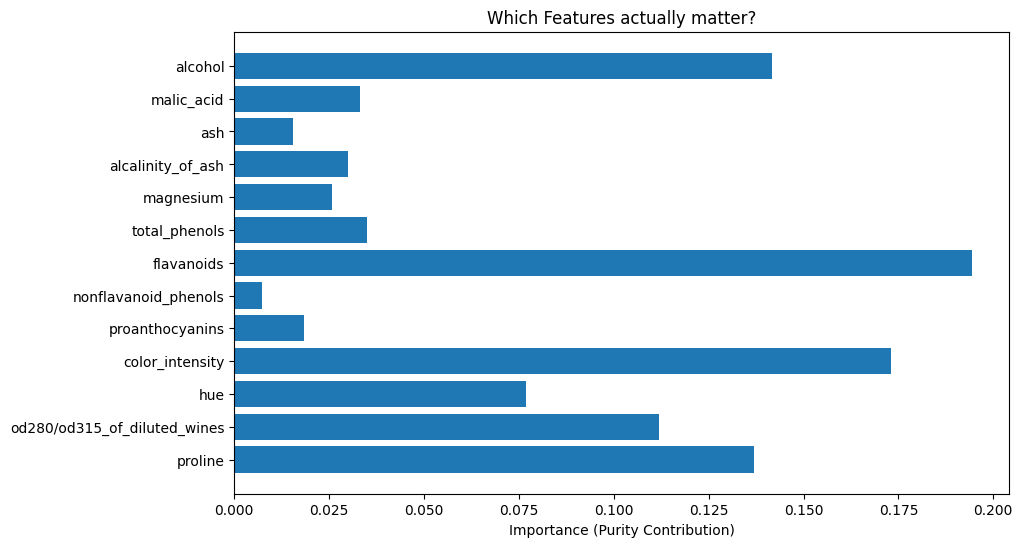


Original Columns: 13
Reduced Columns:  5
We Kept: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']


In [22]:
plt.figure(figsize=(10,6))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.xlabel("Importance (Purity Contribution)")
plt.gca().invert_yaxis() # Highest on top
plt.title("Which Features actually matter?")
plt.show()

# 6. The "Cut": Keep only features with Score > 0.10
useful_features = feature_scores[feature_scores['Score'] > 0.10]['Feature'].tolist()
X_reduced = dataset[useful_features]

print(f"\nOriginal Columns: {dataset.shape[1]}")
print(f"Reduced Columns:  {X_reduced.shape[1]}")
print(f"We Kept: {useful_features}")

In [23]:
print(X_reduced)

     alcohol  flavanoids  color_intensity  od280/od315_of_diluted_wines  \
0      14.23        3.06             5.64                          3.92   
1      13.20        2.76             4.38                          3.40   
2      13.16        3.24             5.68                          3.17   
3      14.37        3.49             7.80                          3.45   
4      13.24        2.69             4.32                          2.93   
..       ...         ...              ...                           ...   
173    13.71        0.61             7.70                          1.74   
174    13.40        0.75             7.30                          1.56   
175    13.27        0.69            10.20                          1.56   
176    13.17        0.68             9.30                          1.62   
177    14.13        0.76             9.20                          1.60   

     proline  
0     1065.0  
1     1050.0  
2     1185.0  
3     1480.0  
4      735.0  
..       